# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
from functools import cmp_to_key
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


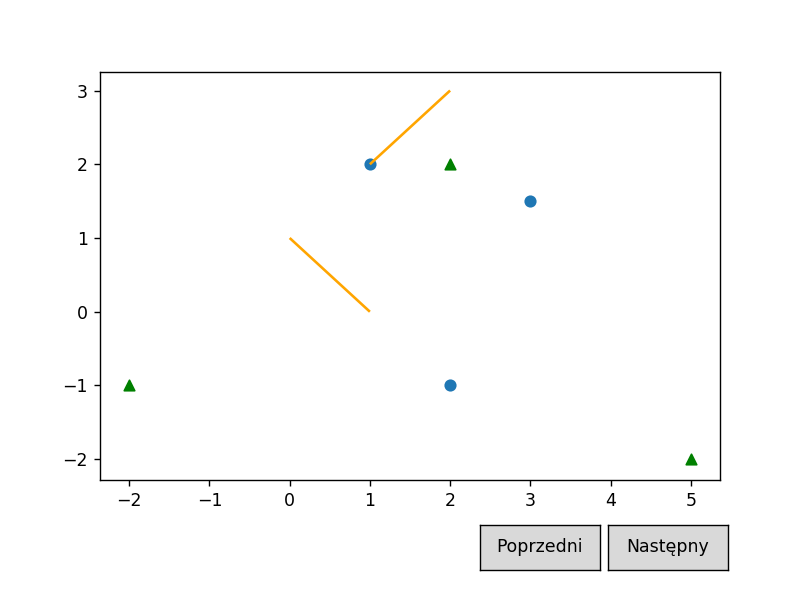

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

liczba punktow1000
przedzial X100
przedzial Y100


<IPython.core.display.Javascript object>


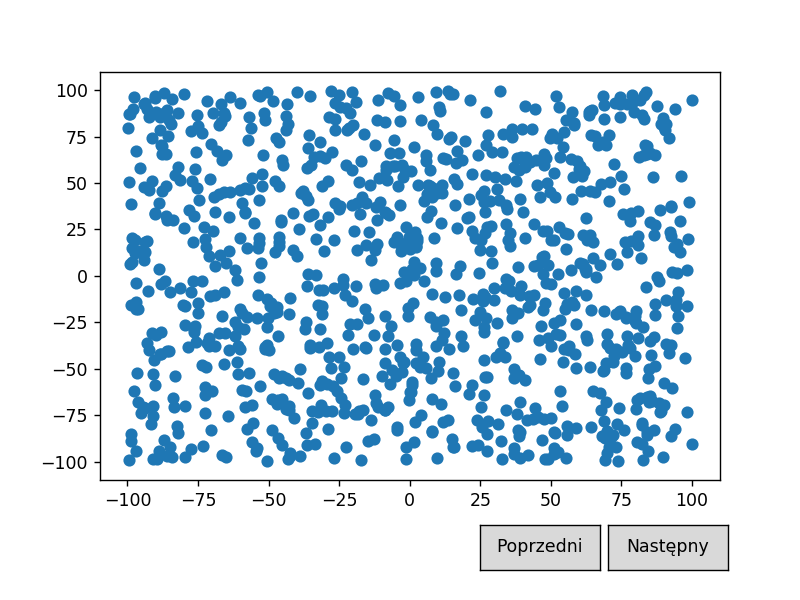

In [4]:
%matplotlib notebook
import random
import math
liczbaPunktow = int(input("liczba punktow"))
X = int(input("przedzial X"))
Y = int(input("przedzial Y"))
points1 = []
for i in range(liczbaPunktow):
    points1.append((random.uniform(-X, X), random.uniform(-Y, Y)))
scenes = [Scene([PointsCollection(points1)])]
plot = (Plot([scenes]))
plot.draw()



liczba punktow100
srodek X0
srodek Y0


<IPython.core.display.Javascript object>


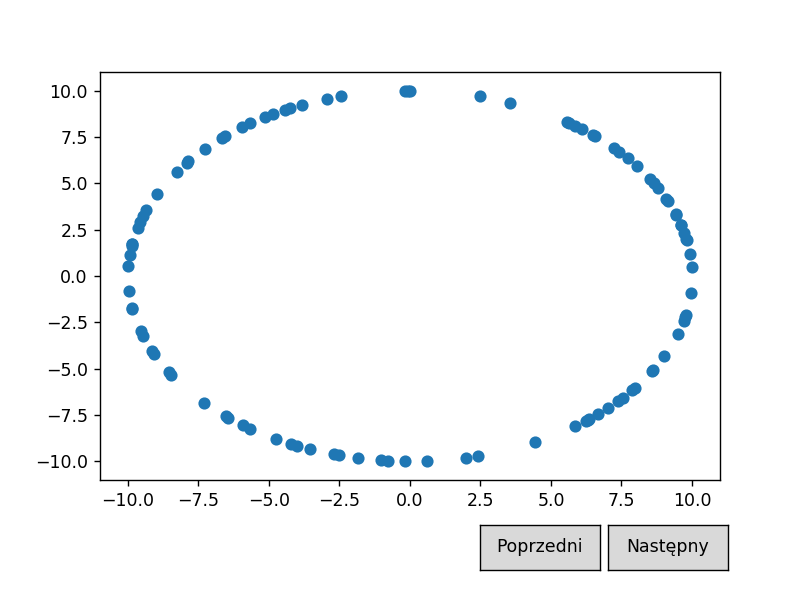

In [5]:
%matplotlib notebook
import random
import math
liczbaPunktow = int(input("liczba punktow"))
X = int(input("srodek X"))
Y = int(input("srodek Y"))
points2 = []
for i in range(liczbaPunktow):
    p = random.uniform(0, 2*math.pi)
    points2.append((10*math.cos(p) + X, 10*math.sin(p) + Y))
scenes = [Scene([PointsCollection(points2)])]
plot = Plot([scenes])
plot.draw()

liczba punktow100
zakres100


<IPython.core.display.Javascript object>


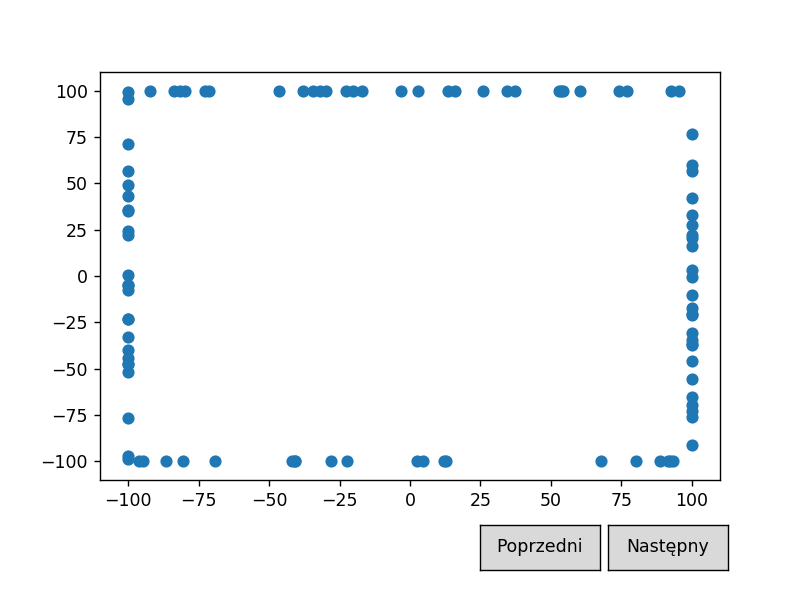

In [6]:
%matplotlib notebook
import random
import math
points3 = []
liczbaPunktow = int(input("liczba punktow"))
X = int(input("zakres"))
for i in range(100):
    p = random.uniform(-X, X)
    znak = random.uniform(1, 2)
    rand = random.uniform(1, 2)
    if(znak >= 1.5): znak = -1
    else: znak = 1
    if(rand <= 1.5):
        points3.append((p, X * znak))
    else:
        points3.append((X * znak, p))
    
    
    
scenes = [Scene([PointsCollection(points3)])]
plot = Plot([scenes])
plot.draw()

<IPython.core.display.Javascript object>


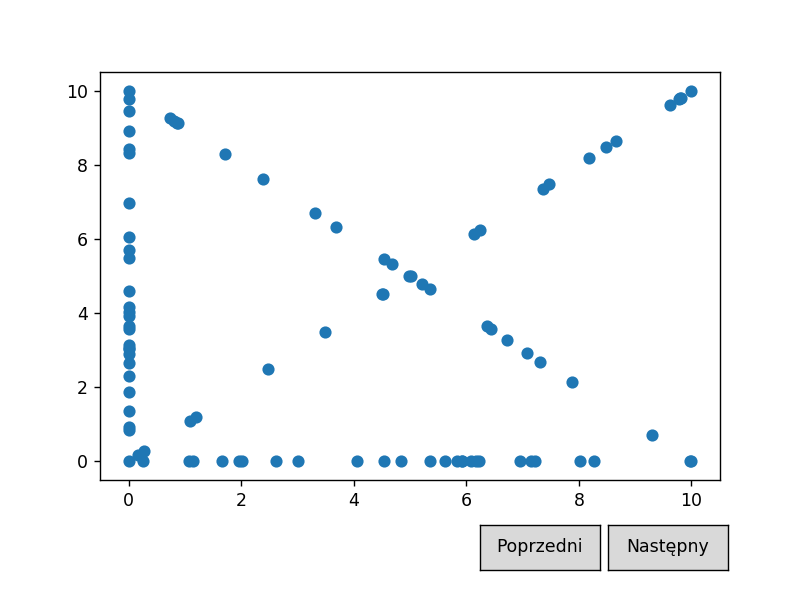

In [7]:
%matplotlib notebook
import random
import math
points4 = []
points4.append((0, 10))
points4.append((0, 0))
points4.append((10, 10))
points4.append((10, 0))
for i in range(25):
    p = random.uniform(0, 10)
    k = random.uniform(0, 10)
    points4.append((0, p))
    points4.append((k, 0))
for i in range(20):
    p = random.uniform(0, 10)
    k = random.uniform(0, 10)
    points4.append((p, 10-p))
    points4.append((k, k))
scenes = [Scene([PointsCollection(points4)])]
plot = Plot([scenes])
plot.draw()

In [8]:
%matplotlib notebook
precision = 0.000000000000000000001

def det1(a, b, c, precision):
    det = (a[0] * b[1]) + (b[0] * c[1]) + (c[0] * a[1]) - (b[1] * c[0]) - (c[1] * a[0]) - (a[1] * b[0])
    if(abs(det) < precision): return 0
    if(det > 0): return 1
    if(det < 0): return -1
    

    



    
    
   
       
           
            
        

In [9]:
def det(a,b,c):
    return np.linalg.det([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
   
def swap(list, i, j):
    point = list[i]
    list[i] = list[j]
    list[j] = point
    
def dlg(p1,p2):
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2

def firstPoint(points):
    firstPoint = points[0]
    for i in points:
        if i[1] < firstPoint[1]:
            firstPoint = i
        elif i[1] == firstPoint[1] and i[0] < firstPoint[0]:
            firstPoint = i
    return firstPoint

def algGraham(points,epsilon):
    start = firstPoint(points)
    def detGraham(p1,p2):
        if det(start,p1,p2) > epsilon:
            return -1
        if det(start,p1,p2) < -epsilon:
            return 1
        else:
            if dlg(start,p1) < dlg(start,p2):
                return -1
            return 1
    points = sorted(points, key = cmp_to_key(detGraham))
    points.remove(start)
    nList=[points[0]]
    j = points[0]
    for i in points[1:]:
        if det(start,j,i)>epsilon:
            nList.append(i)
            j=i
        else:
            nList.pop()
            nList.append(i)
            j=i
    stack = [start,points[0],points[1]]
    i=2
    while i<len(points):
        if det(stack[-2],stack[-1],points[i])>epsilon:
            stack.append(points[i])
            i=i+1
        else:
            stack.pop()
    return stack


def wizualizacjaGraham(points,epsilon):
    start=firstPoint(points)
    def detGraham(p1,p2):
        if det(start,p1,p2) > epsilon:
            return -1
        if det(start,p1,p2) < -epsilon:
            return 1
        else:
            if dlg(start,p1) < dlg(start,p2):
                return -1
            return 1
    points = sorted(points,key = cmp_to_key(detGraham))
    points.remove(start)
    nList = [points[0]]
    j = points[0]
    for i in points[1:]:
        if det(start, j, i) > epsilon:
            nList.append(i)
            j = i
        else:
            nList.pop()
            nList.append(i)
            j = i
    stack = [start, nList[0], nList[1]]
    i = 2
    scenes=[Scene([PointsCollection(points),PointsCollection(stack,'red')])]
    while i < len(nList):
        scenes.append(Scene([PointsCollection(points),PointsCollection(stack, 'red'),PointsCollection([nList[i]],'green')]))
        if det(stack[-2], stack[-1], nList[i]) > epsilon:
            stack.append(nList[i])
            i = i+1
        else:
            stack.pop()
    return scenes    
    

    
        
    

In [72]:
def algJarvis(points, epsilon):
    first = firstPoint(points)
    otoczka = [first]
    while True:
        activeP = otoczka[-1]
        nextP = points[0]
        for i in points:
            if det(activeP , nextP , i) < -epsilon:
                nextP = i
            elif abs(det(activeP , nextP , i)) < epsilon:
                 if dlg(activeP, nextP) < dlg(activeP, i):
                    nextP = i
        if nextP == first:
            break
        otoczka.append(nextP)
    return otoczka



def JarvisAlgorithmVisualization(points, epsilon):
    first = firstPoint(points)
    otoczka = [first]
    scenes=[Scene([PointsCollection(points),PointsCollection(otoczka, 'red')])]
    while True:
        activeP = otoczka[-1]
        nextP = points[0]
        for i in points:
            scenes.append(Scene([PointsCollection(points),PointsCollection(otoczka,'red'),PointsCollection([nextP],'green')]))
            if det(activeP , nextP , i) < -epsilon:
                nextP = i
            elif abs(det(activeP , nextP , i)) < epsilon:
                 if dlg(activeP, nextP) < dlg(activeP, i):
                    nextP = i
        if nextP == first:
            break
        otoczka.append(nextP)
    return scenes

<IPython.core.display.Javascript object>


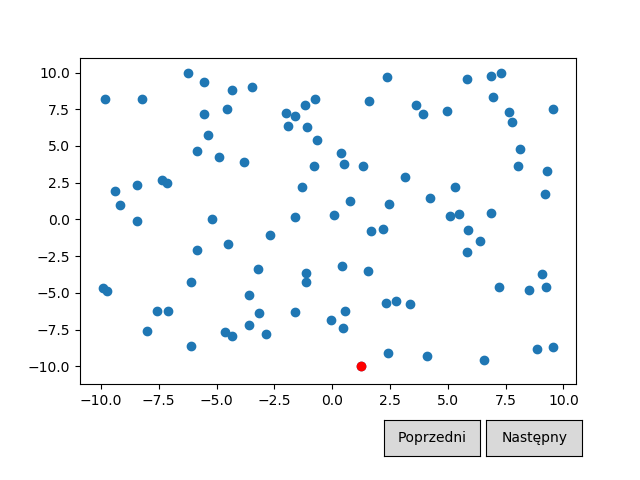

In [73]:
 
scenes = JarvisAlgorithmVisualization(points1, 0.1)
plot = Plot([scenes])
plot.draw()

<IPython.core.display.Javascript object>


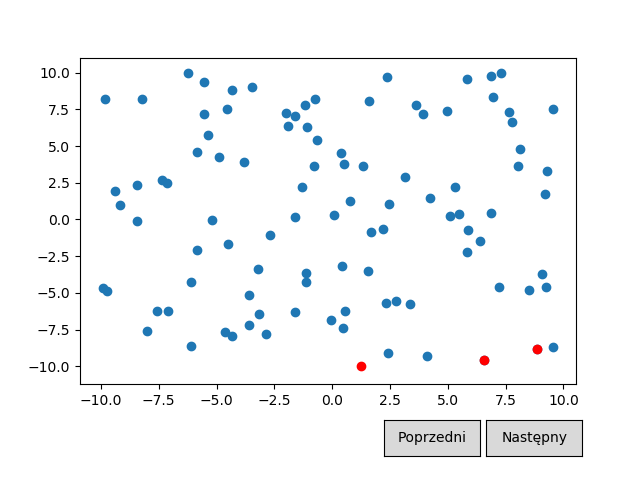

In [74]:
scenes = wizualizacjaGraham(points1, 0.1)
plot = Plot([scenes])
plot.draw()


<IPython.core.display.Javascript object>


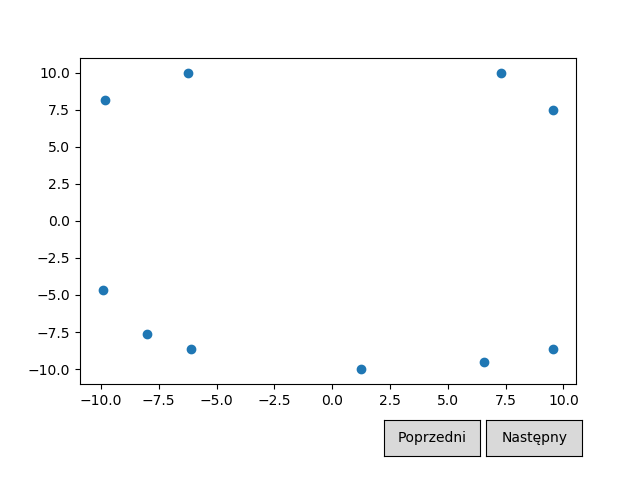

In [75]:
otoczka = (algGraham(points1, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

<IPython.core.display.Javascript object>


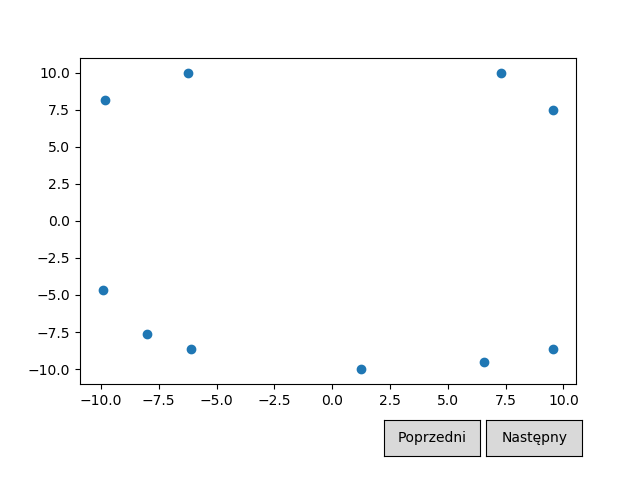

In [76]:
otoczka = (algJarvis(points1, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

<IPython.core.display.Javascript object>


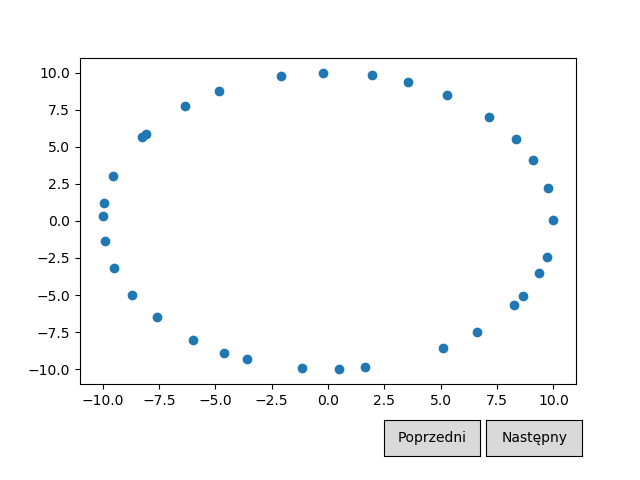

In [77]:
otoczka = (algGraham(points2, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

In [ ]:
otoczka = (algJarvis(points2, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

In [ ]:
otoczka = (algGraham(points3, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

In [ ]:
otoczka = (algJarvis(points3, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

In [ ]:
otoczka = (algGraham(points4, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()

<IPython.core.display.Javascript object>


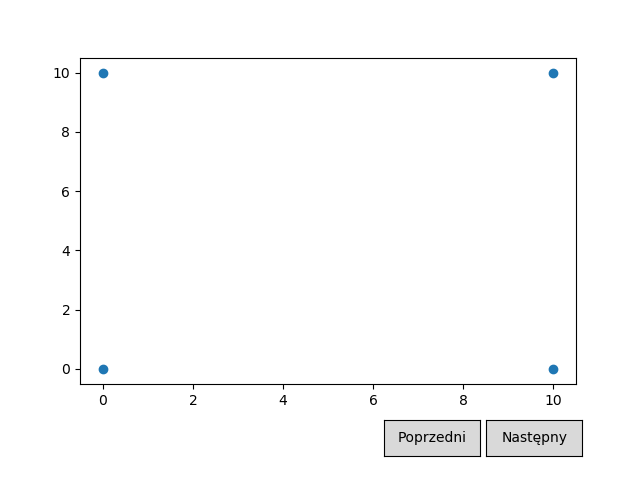

In [28]:
otoczka = (algJarvis(points4, 0.1))

scenes = [Scene([PointsCollection(otoczka)])]
plot = Plot([scenes])
plot.draw()